In [8]:
import matplotlib.pyplot as plt
import time
import serial
import csv
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime

pressure = input("圧力を入力してください(例:4): ")


pressure = f"0.{pressure}"  

圧力を入力してください(例:4):  4


In [9]:
file_count = input("測定回数を入力してください(例:1): ")

測定回数を入力してください(例:1):  1


In [3]:
date = input("推定パラメータの日付を入力してください: ")

推定パラメータの日付を入力してください:  20231125


In [4]:
data_date = input("データの日付を入力してください: ")

データの日付を入力してください:  20231218


In [5]:
measurement_kind = input("マッキベンの種類を入力してください: ")

マッキベンの種類を入力してください:  s


推定パラメータの測定回数を入力してください:  5


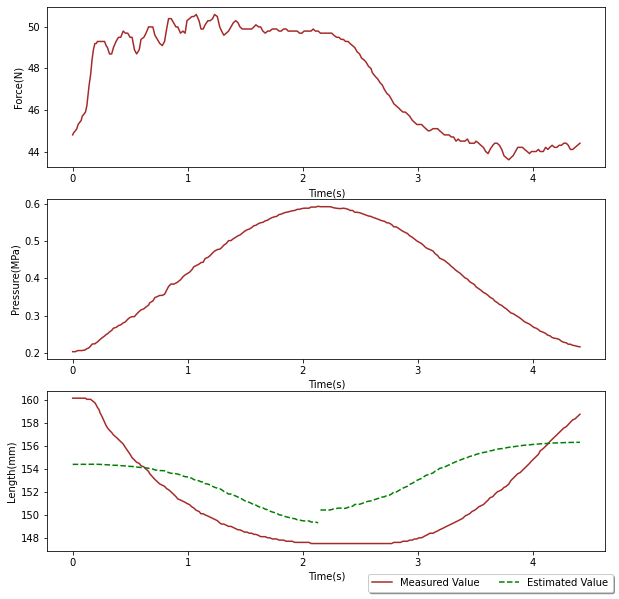

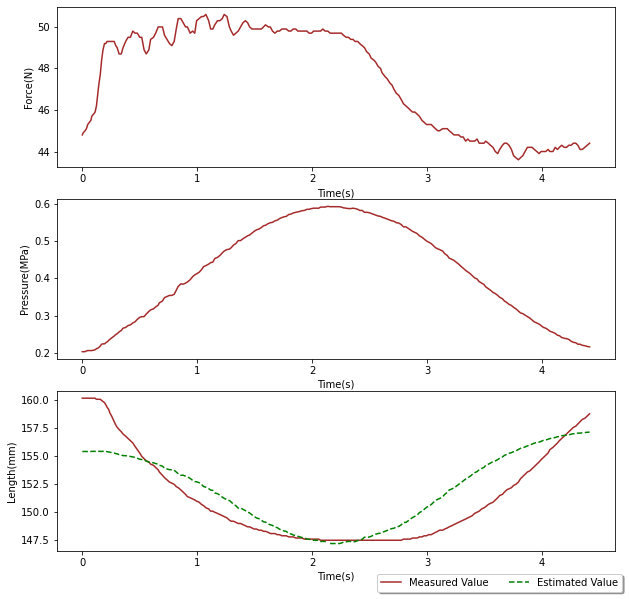

In [15]:
count = input("推定パラメータの測定回数を入力してください: ") 

 

def calculate_L(data,c4,c3, c2, c1, c0):
    P, F = data
    L =  c4* P**3 +c3 *P**2*F + c2*P*F**2 + c1 * F**3 + c0 
    return L


# 以下Lのフィッティング
csv_file_path = f'C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\estimated_parameter_length_3d\\L_fit_3d_{date}_{count}_{measurement_kind}_epl.csv'
parameters = pd.read_csv(csv_file_path)

# パラメータの値を取得
c4_e = parameters.loc[parameters['Parameter'] == 'c4_e', 'Value'].values[0]
c3_e = parameters.loc[parameters['Parameter'] == 'c3_e', 'Value'].values[0]
c2_e = parameters.loc[parameters['Parameter'] == 'c2_e', 'Value'].values[0]
c1_e = parameters.loc[parameters['Parameter'] == 'c1_e', 'Value'].values[0]
c0_e = parameters.loc[parameters['Parameter'] == 'c0_e', 'Value'].values[0]

c4_c = parameters.loc[parameters['Parameter'] == 'c4_c', 'Value'].values[0]
c3_c = parameters.loc[parameters['Parameter'] == 'c3_c', 'Value'].values[0]
c2_c = parameters.loc[parameters['Parameter'] == 'c2_c', 'Value'].values[0]
c1_c = parameters.loc[parameters['Parameter'] == 'c1_c', 'Value'].values[0]
c0_c = parameters.loc[parameters['Parameter'] == 'c0_c', 'Value'].values[0]


# CSVファイルのパス
csv_file_path = f'C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\pressure_control\\output\\{data_date}_{file_count}_{measurement_kind}_{pressure}_partial_p_output_3d_by_{count}.csv'

# CSVファイルの読み込み
dt = pd.read_csv(csv_file_path)


# time_contraction と time_extension の欠損値を0で埋める
dt['time_contraction'].fillna(0, inplace=True)
dt['time_extension'].fillna(0, inplace=True)

# 新しい列 time_elapsed を作成
dt['time_elapsed'] = dt['time_contraction'] + dt['time_extension']


column = dt[["time", "length", "pressure", "force",'time_elapsed','time_contraction','time_extension',"estimated_contraction_length","estimated_extension_length"]]

time_values = column['time_elapsed'].values
pressure_values = column["pressure"].values
length_values = column["length"].values
force_values = column["force"].values
time_contraction = column["time_contraction"].values
time_extension = column["time_extension"].values
estimated_contraction_length= column["estimated_contraction_length"]
estimated_extension_length = column["estimated_extension_length"]

# センサー値グラフ
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
plt.plot(time_values, force_values, color='brown', label='Measured Value')
plt.xlabel('Time(s)')
plt.ylabel('Force(N)')

plt.subplot(3, 1, 2)
plt.plot(time_values, pressure_values, color='brown', label='Measured Value')
plt.xlabel('Time(s)')
plt.ylabel('Pressure(MPa)')

plt.subplot(3, 1, 3)
# ここに推定されたLを点線で追加する．
plt.plot(time_values, length_values, color='brown', label='Measured Value')
plt.plot(time_contraction, estimated_contraction_length, '--', color='green', label='Estimated Value')
plt.plot(time_extension, estimated_extension_length, '--', color='green')
plt.xlabel('Time(s)')
plt.ylabel('Length(mm)')

# グラフ全体の凡例を追加
handles, labels = plt.gca().get_legend_handles_labels()
plt.figlegend(handles, labels, loc='upper center', bbox_to_anchor=(0.74, 0.1), ncol=5, fancybox=True, shadow=True)



# グラフを保存
file_name_partial_com15 = f"{data_date}_{file_count}_{measurement_kind}_{pressure}_partial_p_output_3d"
save_path_com15 = 'C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\graph\\pressure_control\\output\\'
plt.savefig(save_path_com15 + file_name_partial_com15 + f"_3d_by_{count}.jpg", bbox_inches='tight', pad_inches=0.1)  # pad_inchesの値を調整してください

# グラフを表示
plt.show()

# 以下2dフィッティング

def calculate_L(data, c3, c2, c1, c0):
    P, F = data
    L =  c3* P**2 + c2 * P * F + c1 * F**2 + c0
    return L


# 以下Lのフィッティング
csv_file_path = f'C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\estimated_parameter_length\\L_fit_{date}_{count}_{measurement_kind}_epl.csv'
parameters = pd.read_csv(csv_file_path)

# パラメータの値を取得
c3_e = parameters.loc[parameters['Parameter'] == 'c3_e', 'Value'].values[0]
c2_e = parameters.loc[parameters['Parameter'] == 'c2_e', 'Value'].values[0]
c1_e = parameters.loc[parameters['Parameter'] == 'c1_e', 'Value'].values[0]
c0_e = parameters.loc[parameters['Parameter'] == 'c0_e', 'Value'].values[0]

c3_c = parameters.loc[parameters['Parameter'] == 'c3_c', 'Value'].values[0]
c2_c = parameters.loc[parameters['Parameter'] == 'c2_c', 'Value'].values[0]
c1_c = parameters.loc[parameters['Parameter'] == 'c1_c', 'Value'].values[0]
c0_c = parameters.loc[parameters['Parameter'] == 'c0_c', 'Value'].values[0]


# CSVファイルの読み込み
dt = pd.read_csv(
    f"C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\pressure_control\\output\\{data_date}_{file_count}_{measurement_kind}_{pressure}_partial_p_output_2d_by_{count}.csv"
)


# time_contraction と time_extension の欠損値を0で埋める
dt['time_contraction'].fillna(0, inplace=True)
dt['time_extension'].fillna(0, inplace=True)

# 新しい列 time_elapsed を作成
dt['time_elapsed'] = dt['time_contraction'] + dt['time_extension']


column = dt[["time", "length", "pressure", "force",'time_elapsed','time_contraction','time_extension',"estimated_contraction_length","estimated_extension_length"]]

time_values = column['time_elapsed'].values
pressure_values = column["pressure"].values
length_values = column["length"].values
force_values = column["force"].values
time_contraction = column["time_contraction"].values
time_extension = column["time_extension"].values
estimated_contraction_length= column["estimated_contraction_length"]
estimated_extension_length = column["estimated_extension_length"]

# センサー値グラフ
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
plt.plot(time_values, force_values, color='brown', label='Measured Value')
plt.xlabel('Time(s)')
plt.ylabel('Force(N)')

plt.subplot(3, 1, 2)
plt.plot(time_values, pressure_values, color='brown', label='Measured Value')
plt.xlabel('Time(s)')
plt.ylabel('Pressure(MPa)')

plt.subplot(3, 1, 3)
# ここに推定されたLを点線で追加する．
plt.plot(time_values, length_values, color='brown', label='Measured Value')
plt.plot(time_contraction, estimated_contraction_length, '--', color='green', label='Estimated Value')
plt.plot(time_extension, estimated_extension_length, '--', color='green')
plt.xlabel('Time(s)')
plt.ylabel('Length(mm)')

# グラフ全体の凡例を追加
handles, labels = plt.gca().get_legend_handles_labels()
plt.figlegend(handles, labels, loc='upper center', bbox_to_anchor=(0.74, 0.1), ncol=5, fancybox=True, shadow=True)
# グラフを保存
file_name_partial_com15 = f"{data_date}_{file_count}_{measurement_kind}_{pressure}_partial_p_output_3d"
save_path_com15 = 'C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\graph\\pressure_control\\output\\'
plt.savefig(save_path_com15 + file_name_partial_com15 + f"_2d_by_{count}.jpg")

# グラフを表示
plt.show()